In [1]:
import torch
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Generate data

### Generators

In [2]:
def tensor_generator(shape, distribution='normal'):
    while True:
        if distribution == 'normal':
            yield torch.randn(shape)
        elif distribution == 'uniform':
            yield torch.rand(shape)
        else:
            raise ValueError(f'Unknown distribution: {distribution}')

In [3]:
def noise_generator(centroid, std=0.1):
    while True:
        yield centroid + torch.randn_like(centroid) * std

In [4]:
def generate_data(shape, n_centroids, n_samples, std, distribution):
    centroid_generator = tensor_generator(shape, distribution)
    centroids = [next(centroid_generator) for _ in range(n_centroids)]

    noise_generators = [noise_generator(centroid, std) for centroid in centroids]

    noisy_tensors = torch.stack([next(noise_generators[i % n_centroids]) for i in range(n_samples)])

    return noisy_tensors, centroids

## Clustering

In [5]:
def k_means_clustering(data, n_clusters, random_state=42):
    data_np = data.cpu().numpy()

    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_np)

    return torch.from_numpy(kmeans.labels_)

### Hyperparameters

In [6]:
N_CENTROIDS = 10
N = 9000
STD = 0.5
SHAPE = (512)
DIST = 'uniform'

In [7]:
noisy_tensors, centroids = generate_data(SHAPE, N_CENTROIDS, N, STD, DIST)

In [8]:
N_CLUSTERS = 5
labels = k_means_clustering(noisy_tensors, N_CLUSTERS)

c:\Users\nazar\anaconda3\envs\torch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nazar\anaconda3\envs\torch\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nazar\anaconda3\envs\torch\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


## Visualization

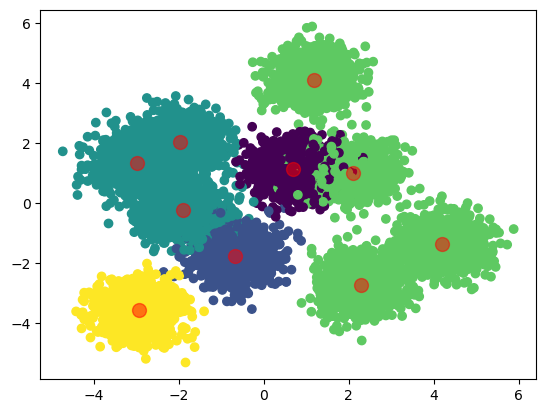

In [9]:
pca = PCA(n_components=2)
noisy_tensors_2d = pca.fit_transform(noisy_tensors)

plt.scatter(noisy_tensors_2d[:, 0], noisy_tensors_2d[:, 1], c=labels, cmap='viridis')

centroids_2d = pca.transform(torch.stack(centroids))
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', s=100, alpha=0.5)

plt.show()

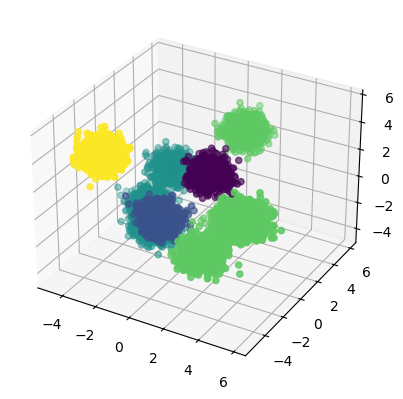

In [10]:
pca = PCA(n_components=3)
noisy_tensors_3d = pca.fit_transform(noisy_tensors)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(noisy_tensors_3d[:, 0], noisy_tensors_3d[:, 1], noisy_tensors_3d[:, 2], c=labels, cmap='viridis')

centroids_3d = pca.transform(torch.stack(centroids))
ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], c='red', s=100, alpha=0.5)

plt.show()